<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/r_colab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘Rcpp’, ‘RcppArmadillo’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’

# New Section

In [4]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend



Attaching package: ‘TSA’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Loading required package: timeDate


Attaching package: ‘timeDate’


The following objects are masked from ‘package:TSA’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAn

In [5]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-16"

In [7]:
# Download data from Yahoo Finance
symbol<-getSymbols("HDFC.NS",from=start_date,auto.assign=FALSE)



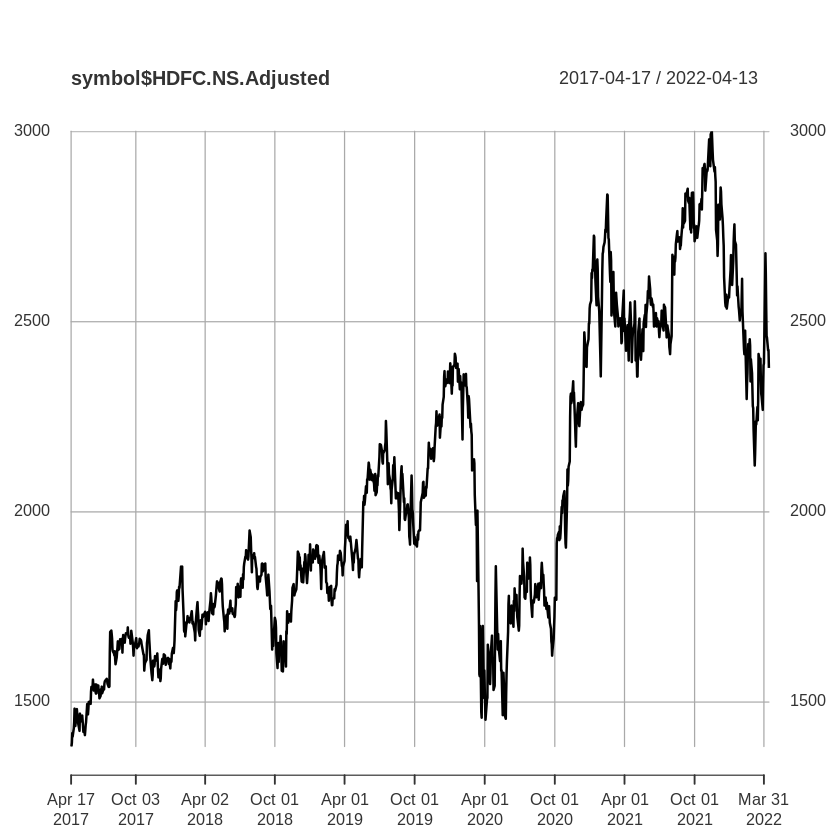

In [8]:
plot(symbol$HDFC.NS.Adjusted)

In [9]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$HDFC.NS.Volume>0,]

     Index             HDFC.NS.Open   HDFC.NS.High   HDFC.NS.Low  
 Min.   :2017-04-17   Min.   :1475   Min.   :1491   Min.   :1470  
 1st Qu.:2018-07-10   1st Qu.:1794   1st Qu.:1819   1st Qu.:1771  
 Median :2019-10-20   Median :1978   Median :1995   Median :1956  
 Mean   :2019-10-15   Mean   :2097   Mean   :2120   Mean   :2071  
 3rd Qu.:2021-01-13   3rd Qu.:2423   3rd Qu.:2448   3rd Qu.:2402  
 Max.   :2022-04-13   Max.   :3004   Max.   :3021   Max.   :2971  
 HDFC.NS.Close  HDFC.NS.Volume     HDFC.NS.Adjusted
 Min.   :1480   Min.   :  119832   Min.   :1383    
 1st Qu.:1791   1st Qu.: 2224355   1st Qu.:1718    
 Median :1976   Median : 3155742   Median :1890    
 Mean   :2096   Mean   : 3686374   Mean   :2036    
 3rd Qu.:2423   3rd Qu.: 4327454   3rd Qu.:2382    
 Max.   :3001   Max.   :34117717   Max.   :3001    

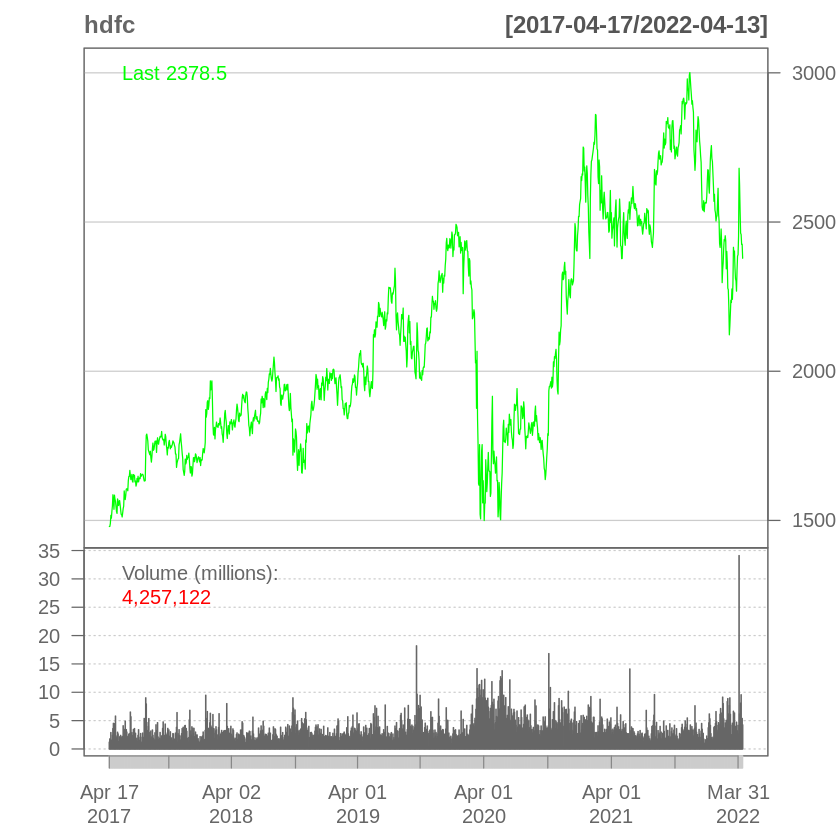

In [10]:
chartSeries(symbol,theme="white.mono",name="hdfc",type = 'line', up.col = "green",dn.col="red")

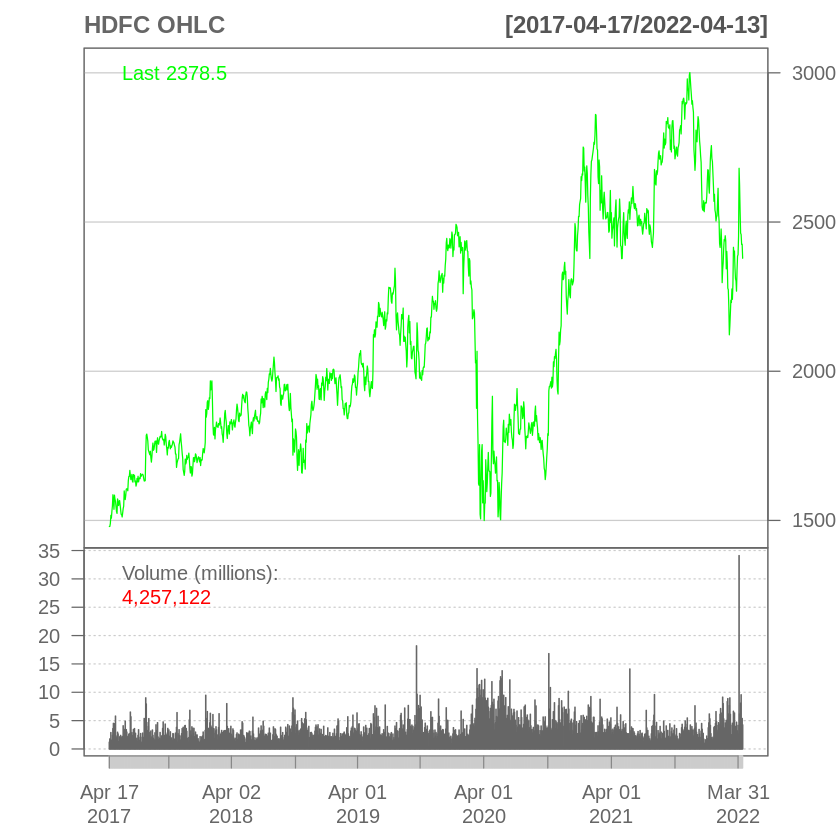

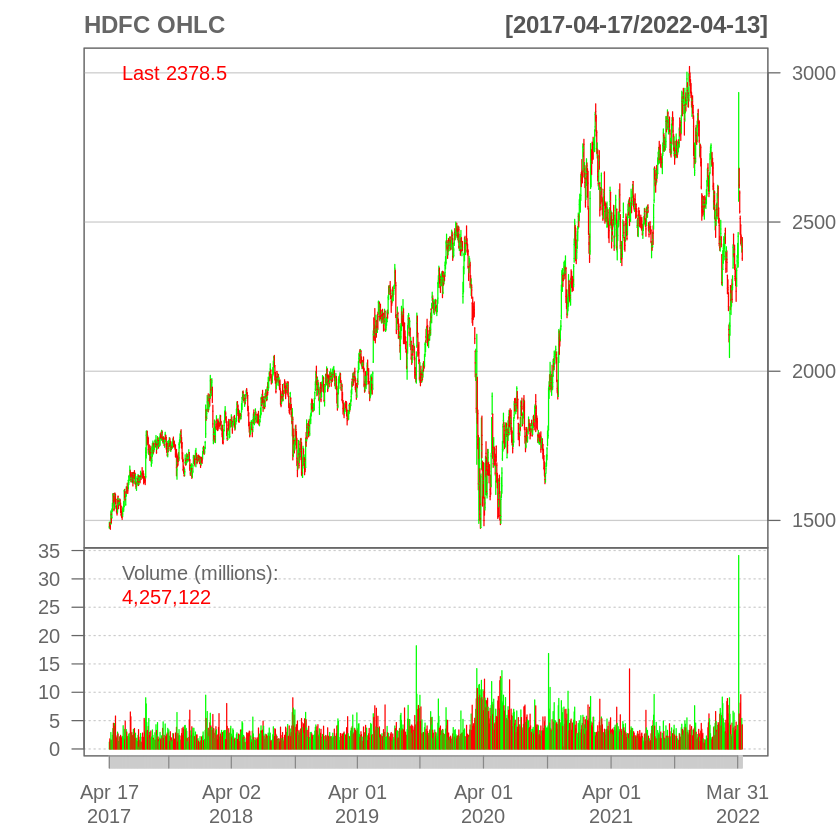

In [11]:
# Convert the Yahoo data into an OHLC Chart
symbol_ohlc<-as.quantmod.OHLC(symbol[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(symbol_ohlc, theme="white.mono", type ='line', name="HDFC OHLC", up.col = "green",dn.col="red")
chartSeries(symbol_ohlc, theme="white.mono", type ='bar',  name="HDFC OHLC", up.col = "green",dn.col="red")
# chartSeries(symbol_ohlc, theme="white.mono", type ='hlc',  name="HDFC OHLC", up.col = "green",dn.col="red")

In [12]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$HDFC.NS.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"hdfc_returns.csv",row.names=FALSE)

           HDFC.NS.Adjusted
2017-04-18     0.0003377706
2017-04-19     0.0068346133
2017-04-20     0.0178903487
2017-04-21    -0.0063813026
2017-04-24     0.0153057134
2017-04-25     0.0114969539

In [13]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$HDFC.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 101.5332
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Sat Apr 16 12:12:03 2022 by user: 


In [14]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for HDFC
jarqueberaTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 2827.5849
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Sat Apr 16 12:12:13 2022 by user: 


In [15]:
# Now we do other tests for same data for cross check
shapiroTest(prices$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9303
  P VALUE:
    < 2.2e-16 

Description:
 Sat Apr 16 12:12:21 2022 by user: 


In [16]:
# hdfc return are 0.1809 shows it to be normal again.
shapiroTest(returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9134
  P VALUE:
    < 2.2e-16 

Description:
 Sat Apr 16 12:12:29 2022 by user: 


In [17]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$HDFC.NS.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$HDFC.NS.Adjusted
Dickey-Fuller = -2.5337, Lag order = 10, p-value = 0.3524
alternative hypothesis: stationary


In [18]:
adf.test(returns$HDFC.NS.Adjusted) 

Warning message in adf.test(returns$HDFC.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$HDFC.NS.Adjusted
Dickey-Fuller = -11.531, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [19]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$HDFC.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-228.104  -18.526    0.356   19.197  226.534 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    0.0001657  0.0005396   0.307    0.759
z.diff.lag 0.0130807  0.0285154   0.459    0.647

Residual standard error: 39.31 on 1232 degrees of freedom
Multiple R-squared:  0.0002542,	Adjusted R-squared:  -0.001369 
F-statistic: 0.1566 on 2 and 1232 DF,  p-value: 0.855


Value of test-statistic is: 0.3072 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [20]:
summary(ur.df(returns$HDFC.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.142713 -0.009407  0.000679  0.010171  0.097107 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.07652    0.04026 -26.739  < 2e-16 ***
z.diff.lag  0.07389    0.02843   2.599  0.00947 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01965 on 1231 degrees of freedom
Multiple R-squared:  0.5038,	Adjusted R-squared:  0.503 
F-statistic: 624.8 on 2 and 1231 DF,  p-value: < 2.2e-16


Value of test-statistic is: -26.7389 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [21]:
summary(ur.kpss(prices$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 10.7527 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [22]:
summary(ur.kpss(returns$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.057 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


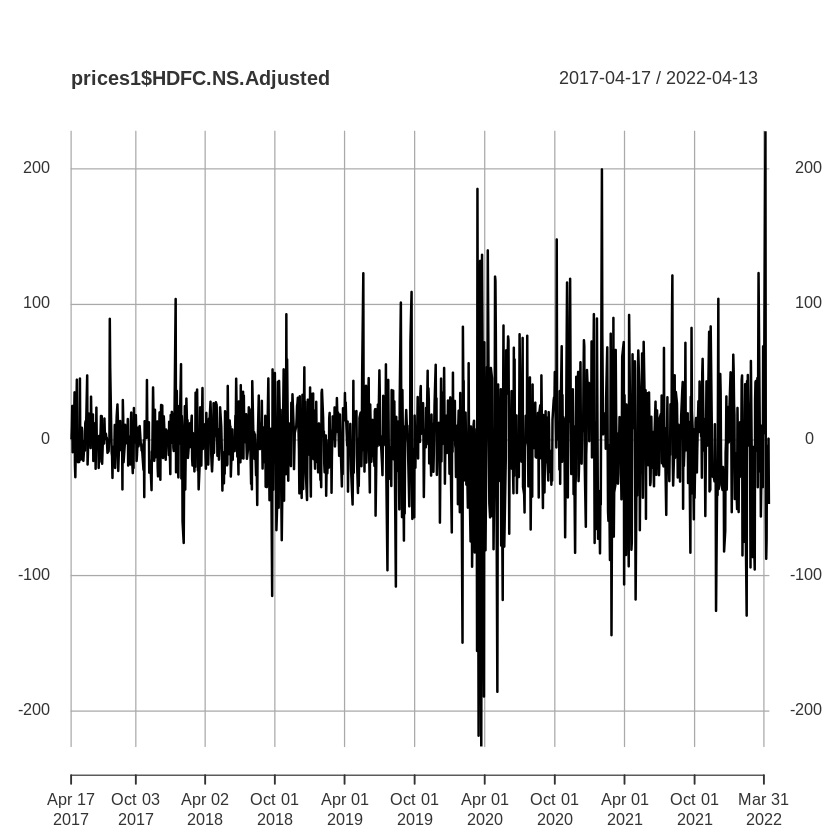

In [23]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices1 <- diff(prices)
plot (prices1$HDFC.NS.Adjusted)

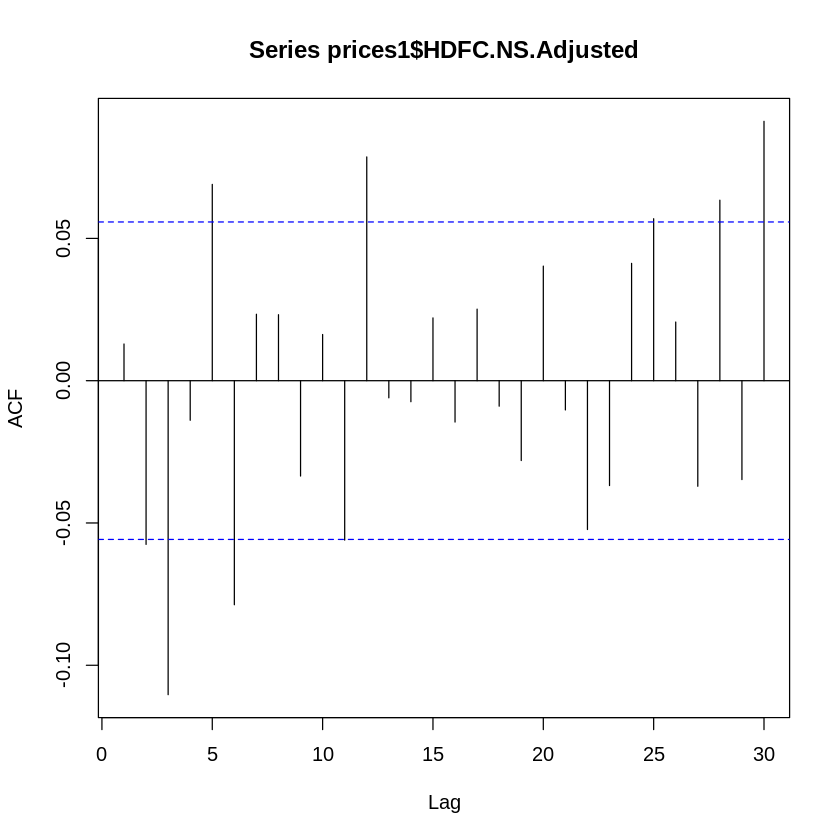

In [24]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices1<-na.omit(prices1)
acf(prices1$HDFC.NS.Adjusted)

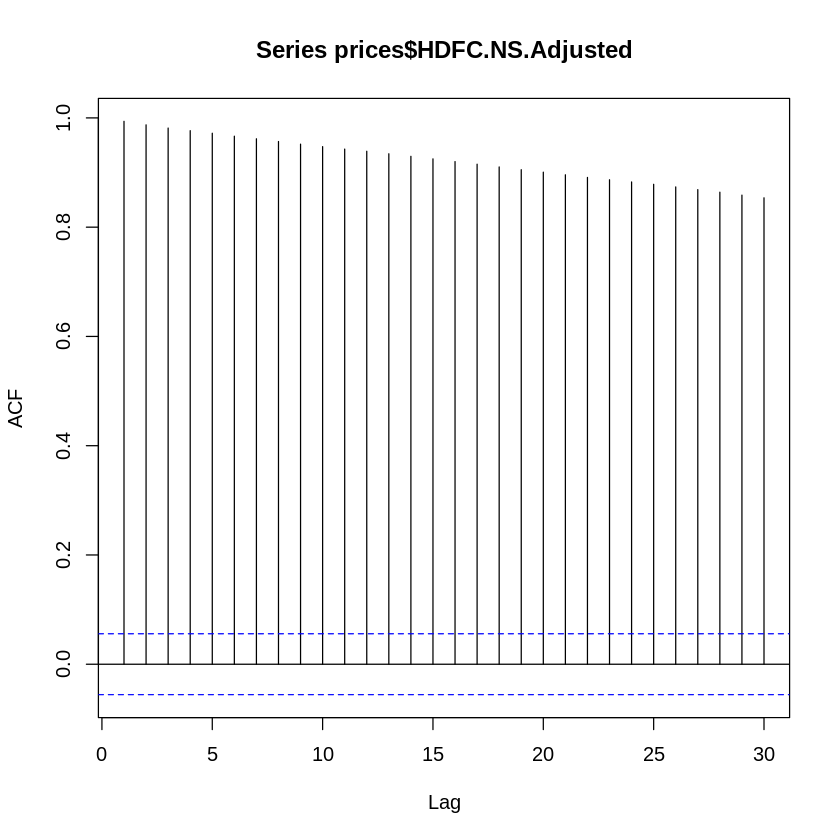

In [25]:
# on the otherhand if we compute ACF on data with trend
acf(prices$HDFC.NS.Adjusted)

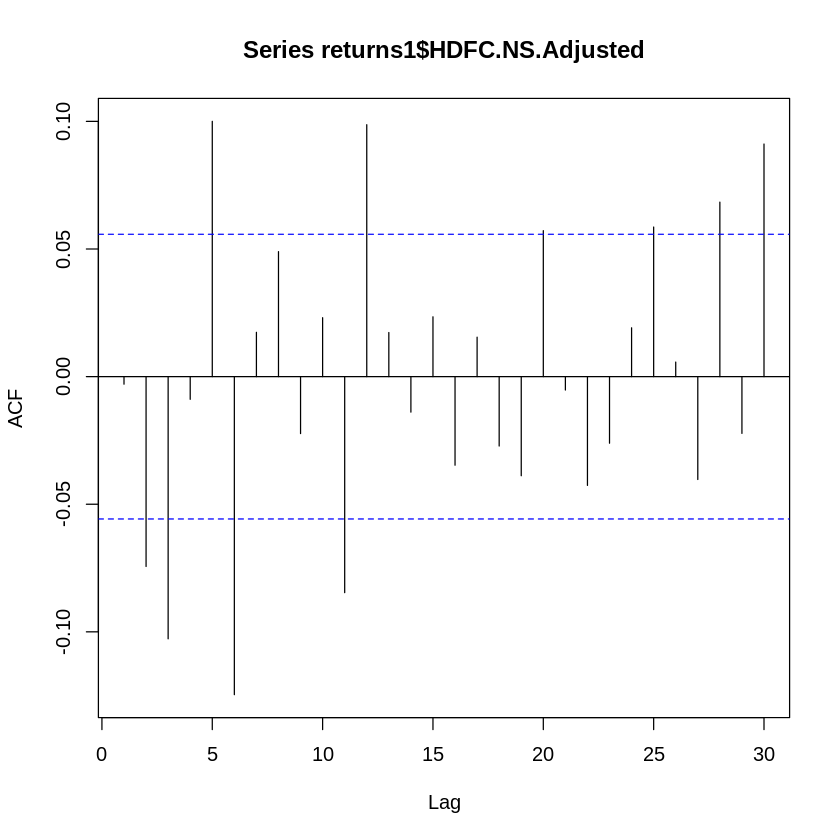

In [26]:
# similarly, finding acf for returns.
returns1<-na.omit(returns)
acf(returns1$HDFC.NS.Adjusted)

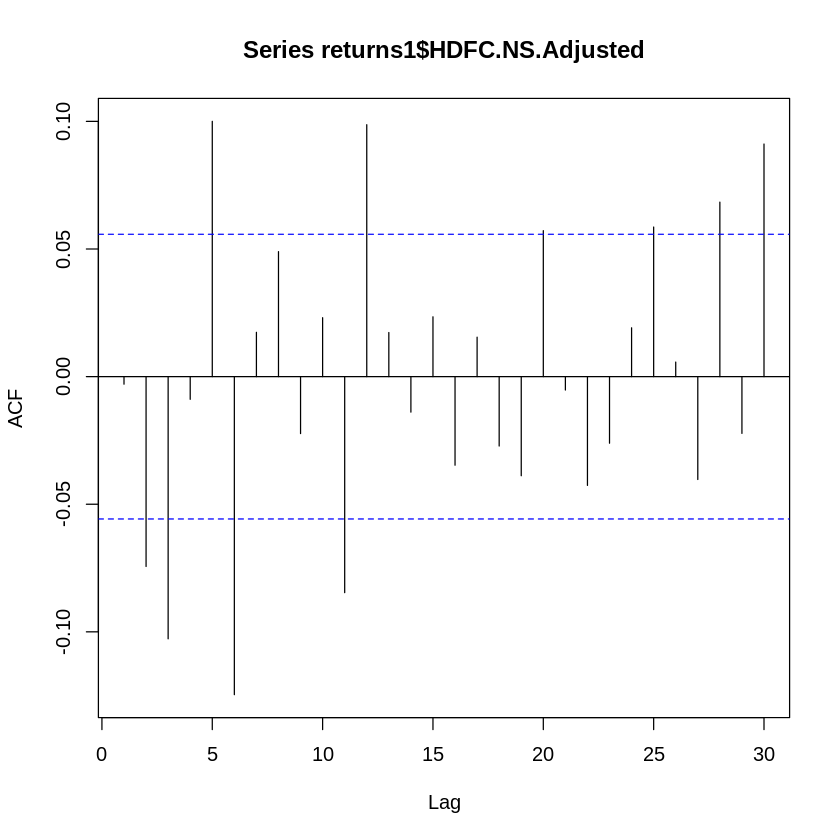

In [27]:
# on the otherhand if we compute ACF on data with trend
acf(returns1$HDFC.NS.Adjusted)

In [28]:
# tests for auto-corelation
Box.test(prices1$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices1$HDFC.NS.Adjusted
X-squared = 25.547, df = 5, p-value = 0.0001092


In [29]:
# for returns
Box.test(returns1$HDFC.NS.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns1$HDFC.NS.Adjusted
X-squared = 32.472, df = 5, p-value = 4.79e-06


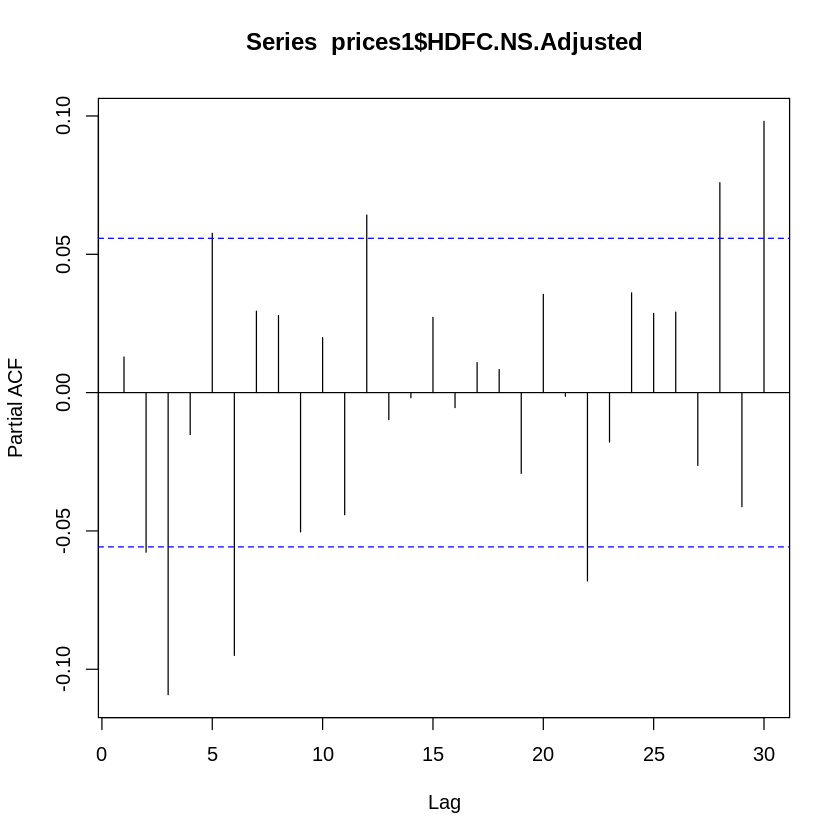

In [30]:
#PACF
pacf(prices1$HDFC.NS.Adjusted)

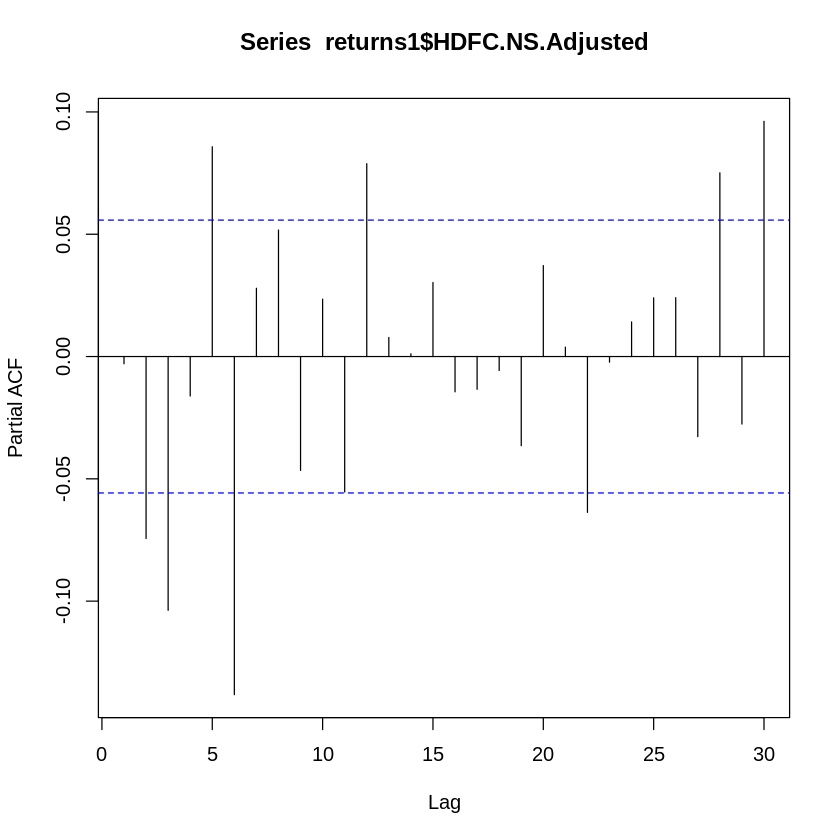

In [31]:
pacf(returns1$HDFC.NS.Adjusted)

In [32]:
basicStats(prices)

,HDFC.NS.Adjusted
,<dbl>
nobs,1.236000e+03
NAs,0.000000e+00
Minimum,1.383205e+03
Maximum,3.000850e+03
1. Quartile,1.717917e+03
3. Quartile,2.382040e+03
Mean,2.036283e+03
Median,1.889768e+03
Sum,2.516846e+06


In [33]:
BoxCox.lambda(prices$HDFC.NS.Adjusted)

[1] 0.8968656

In [34]:
prices2<-prices
prices2$HDFC.NS.Adjusted<-forecast::BoxCox(prices$HDFC.NS.Adjusted, lambda = 0.896865603415821)
basicStats(prices2)

,HDFC.NS.Adjusted
,<dbl>
nobs,1.236000e+03
NAs,0.000000e+00
Minimum,7.304044e+02
Maximum,1.464073e+03
1. Quartile,8.873388e+02
3. Quartile,1.189968e+03
Mean,1.031899e+03
Median,9.666519e+02
Sum,1.275428e+06


In [35]:
returns2<-returns
# to handle negative values in the returns
returns2<-exp(returns2)
returns2<-na.omit(returns2)
BoxCox.lambda(returns2$HDFC.NS.Adjusted)


[1] 1.999924

In [36]:
returns2$HDFC.NS.Adjusted<-forecast::BoxCox(returns$HDFC.NS.Adjusted, lambda = 1.99992424816297)
# need to take log, basically to undo the exp above
# returns2<-log(returns2) 
basicStats(returns2)

,HDFC.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,-0.510202
Maximum,-0.495312
1. Quartile,-0.500065
3. Quartile,-0.499968
Mean,-0.500020
Median,-0.500019
Sum,-617.524231


In [38]:
prices3<-prices
prices3<-as.data.frame(prices3)
x<-bestNormalize::boxcox(as.vector({prices3$HDFC.NS.Adjusted}))
basicStats(x$x.t)

,X..x.x.t
,<dbl>
nobs,1236.000000
NAs,0.000000
Minimum,-2.259425
Maximum,1.879537
1. Quartile,-0.776048
3. Quartile,0.949592
Mean,0.000000
Median,-0.215383
Sum,0.000000


In [39]:
returns3<-bestNormalize::yeojohnson(x=returns$HDFC.NS.Adjusted)
basicStats(returns3$x.t)

,HDFC.NS.Adjusted
,<dbl>
nobs,1235.000000
NAs,0.000000
Minimum,-6.485234
Maximum,5.346521
1. Quartile,-0.522761
3. Quartile,0.478839
Mean,0.000000
Median,-0.023399
Sum,0.000000


In [40]:
model<-auto.arima(prices$HDFC.NS.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(6,1,0)


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : 12561.98
 ARIMA(0,1,0) with drift         : 12566.99
 ARIMA(1,1,0) with drift         : 12569.79
 ARIMA(0,1,1) with drift         : 12568.77
 ARIMA(0,1,0)                    : 12565.5
 ARIMA(1,1,2) with drift         : 12562.2
 ARIMA(2,1,1) with drift         : 12561.89
 ARIMA(1,1,1) with drift         : 12571.49
 ARIMA(2,1,0) with drift         : 12568.63
 ARIMA(3,1,1) with drift         : 12558.32
 ARIMA(3,1,0) with drift         : 12556.43
 ARIMA(4,1,0) with drift         : 12559.1
 ARIMA(4,1,1) with drift         : 12556.19
 ARIMA(5,1,1) with drift         : 12553.87
 ARIMA(5,1,0) with drift         : 12557.69
 ARIMA(6,1,1) with drift         : 12550.76
 ARIMA(6,1,0) with drift         : 12549.17
 ARIMA(7,1,0) with drift         : 12550.41
 ARIMA(7,1,1) with drift         : 12552.37
 ARIMA(6,1,0)                    : 12547.88
 ARIMA(5,1,0)                    : 12556.26
 ARIMA(7,1,0)     

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1237       2385.867 2336.119 2435.615 2309.784 2461.950
1238       2395.666 2324.873 2466.459 2287.397 2503.934
1239       2399.296 2313.880 2484.713 2268.663 2529.929
1240       2402.170 2306.989 2497.351 2256.603 2547.737
1241       2397.895 2294.263 2501.527 2239.404 2556.386
1242       2401.989 2289.222 2514.755 2229.527 2574.451
1243       2401.729 2281.880 2521.578 2218.436 2585.022
1244       2401.230 2274.760 2527.701 2207.811 2594.650
1245       2400.674 2267.996 2533.352 2197.760 2603.587
1246       2400.119 2261.255 2538.983 2187.745 2612.493

In [41]:
cor(prices)

,HDFC.NS.Adjusted
HDFC.NS.Adjusted,1


In [42]:
cor(returns)

,HDFC.NS.Adjusted
HDFC.NS.Adjusted,1



	Ljung-Box test

data:  Residuals from ARIMA(6,1,0)
Q* = 4.0726, df = 4, p-value = 0.3963

Model df: 6.   Total lags used: 10



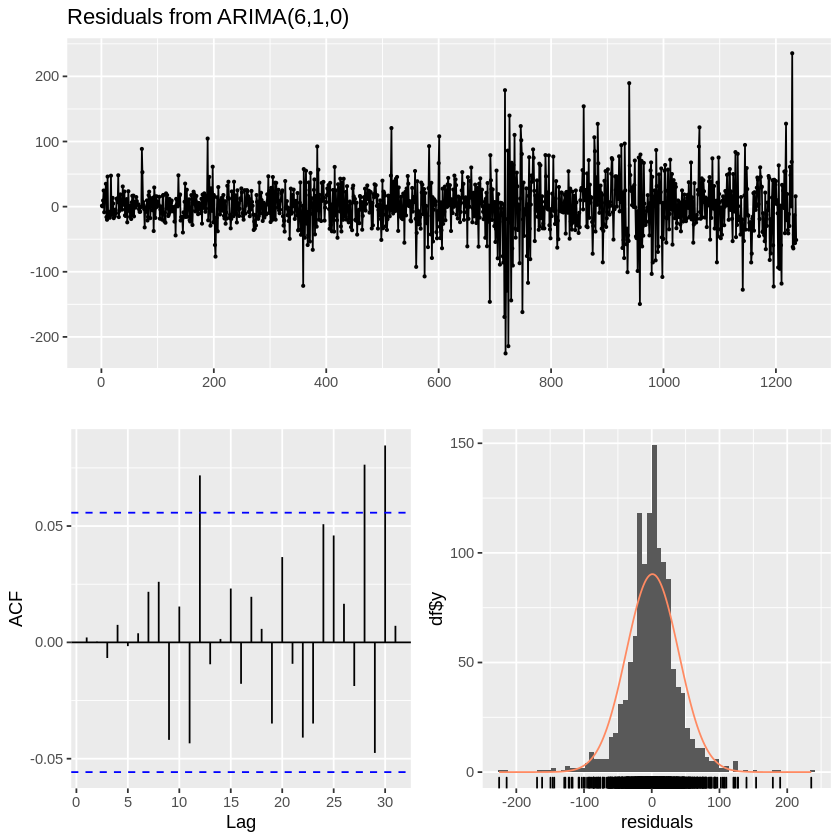

In [44]:
# Model analysis
checkresiduals(model)

In [45]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.9977492,38.7086,26.95784,0.03227368,1.331682,0.9924424,0.002102549


[1] 1236

[1] 43.95572

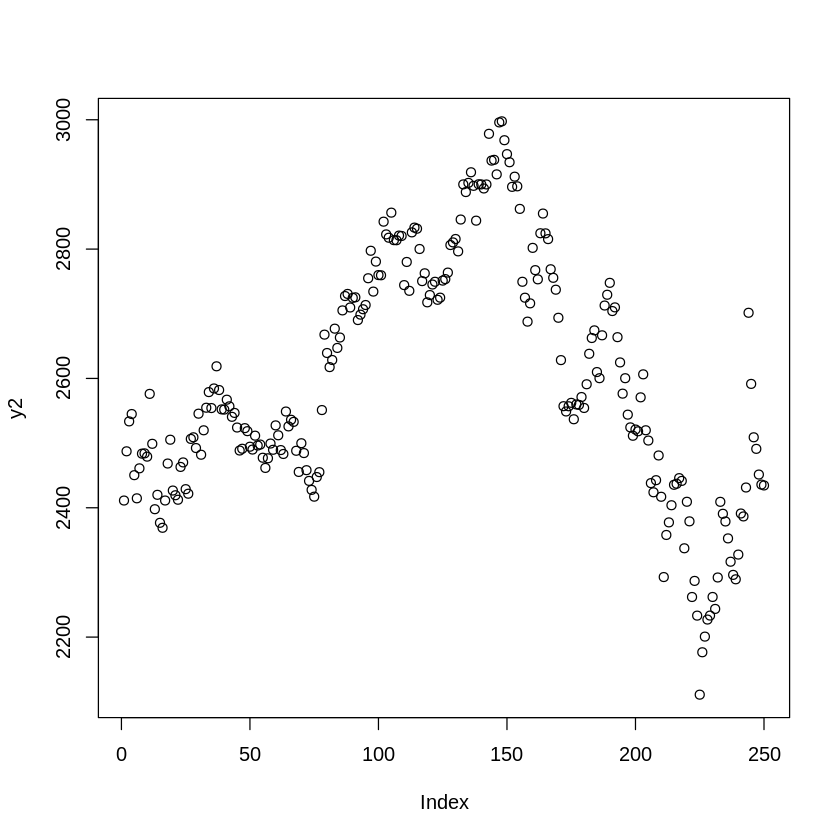

In [48]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 2201 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$HDFC.NS.Adjusted,250)) 


[1] 1235

[1] 0.01750692

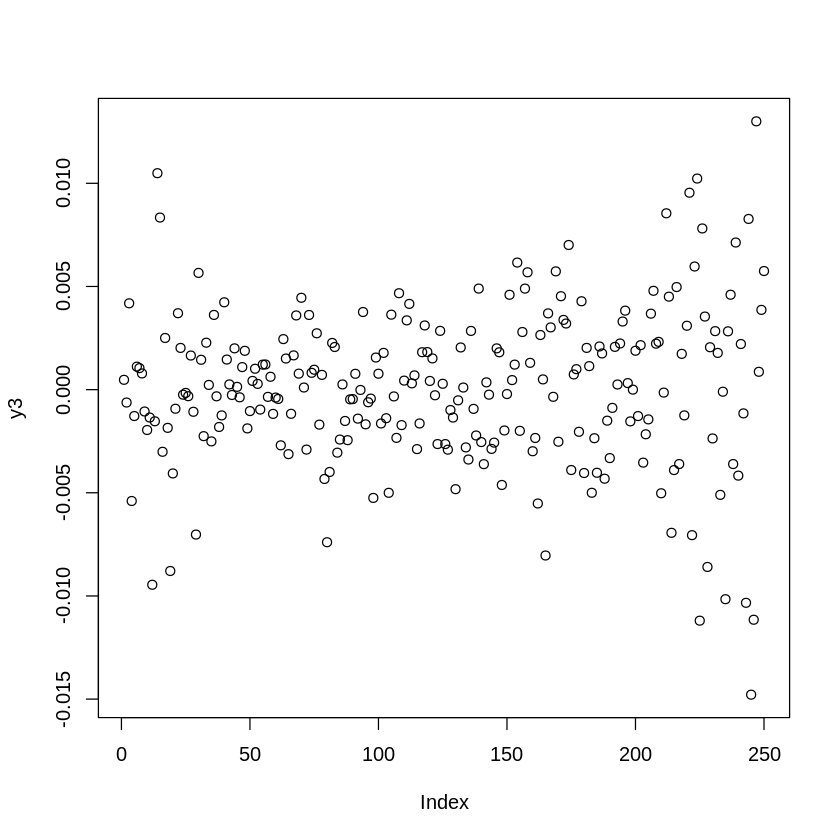

In [49]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$HDFC.NS.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$HDFC.NS.Adjusted,250)) 